<a href="https://colab.research.google.com/github/thisishasan/slda/blob/main/code_bk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download a Heart Failure Clinical Records dataset; the dataset originally source from UC Irvine Machine Learning Repository [https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records]

In [107]:
!wget -nc 'https://raw.githubusercontent.com/thisishasan/slda/refs/heads/main/dataset.csv'

File ‘dataset.csv’ already there; not retrieving.



Import the necessary libraries

In [108]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from scipy.stats import mannwhitneyu, ttest_ind
from scipy.stats import skew, kurtosis

Read and load the dataset csv file into a data frame

In [109]:
file_path = os.path.join('dataset.csv')
df = pd.read_csv(file_path)

Displays the data frame information


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  death_event               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


By default, displays the top five rows of the data frame


In [111]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Describe the data frame

In [112]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


List all numerical variables

In [113]:
numerical_vars = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

List all categorical variables

In [114]:
categorical_vars = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'death_event']

Visualize numerical and categorical variable counts through Pie Chart

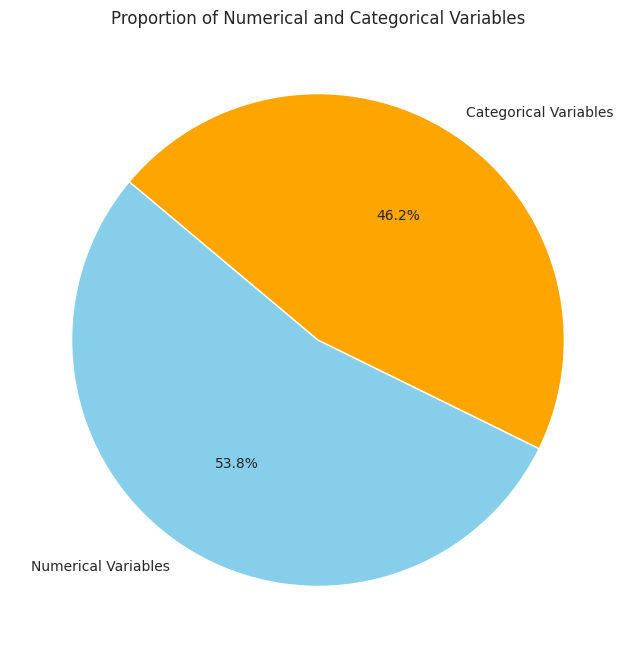

In [115]:
variable_counts = [len(numerical_vars), len(categorical_vars)]
labels = ['Numerical Variables', 'Categorical Variables']
plt.figure(figsize=(8, 8))
plt.pie(variable_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange'])
plt.title('Proportion of Numerical and Categorical Variables')
plt.show()


Checks missing values in the data frame

In [116]:
df.isnull().sum()

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


Total counts of death events segregated by Yes or No

In [117]:
death_event_counts = df['death_event'].value_counts()
death_event_counts

,count
death_event,
0,203
1,96


Percentage of death events segregated by Yes or No

In [118]:
death_event_percentage = df['death_event'].value_counts(normalize=True) * 100
death_event_percentage_rounded = death_event_percentage.round(2)
death_event_percentage_rounded

,proportion
death_event,
0,67.89
1,32.11


<ipython-input-119-29c5935dfbbf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='death_event', data=df, palette='Set2')


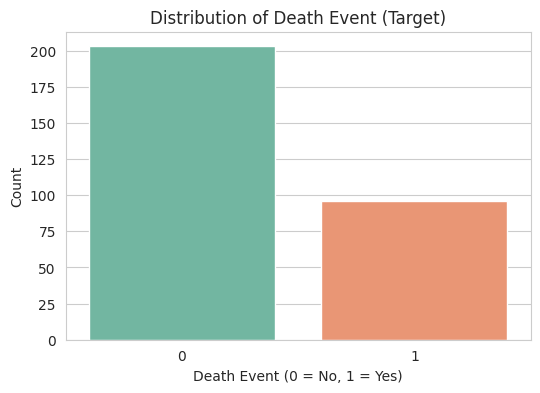

In [119]:
# Distribution of the target variable (death_event)
plt.figure(figsize=(6, 4))
sns.countplot(x='death_event', data=df, palette='Set2')
plt.title("Distribution of Death Event (Target)")
plt.xlabel("Death Event (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

Visualization of Death Events

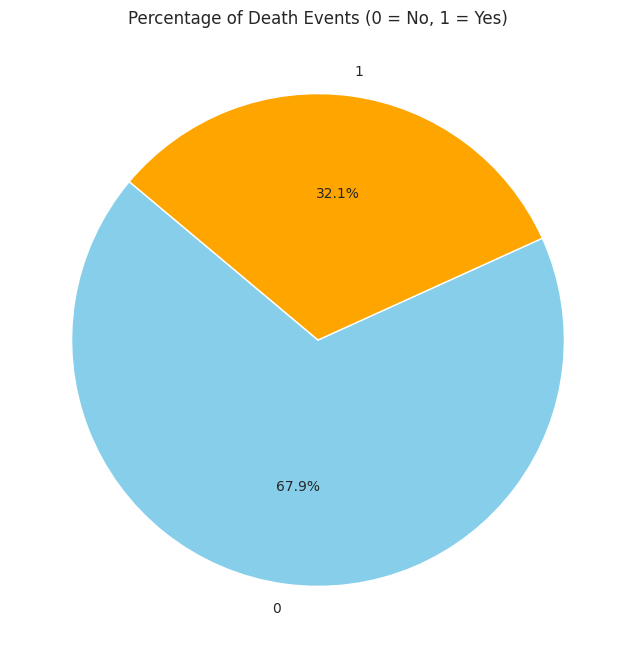

In [120]:
plt.figure(figsize=(8, 8))
death_event_percentage_rounded.plot.pie(autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange'])
plt.title('Percentage of Death Events (0 = No, 1 = Yes)')
plt.ylabel('')
plt.show()

In [121]:
filtered_df_by_deaths = df[df['death_event'] == 1]
filtered_df_by_deaths.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [122]:
filtered_df_by_not_deaths = df[df['death_event'] == 0]
filtered_df_by_not_deaths.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
14,49.0,1,80,0,30,1,427000.0,1.0,138,0,0,12,0
20,65.0,1,52,0,25,1,276000.0,1.3,137,0,0,16,0
23,53.0,0,63,1,60,0,368000.0,0.8,135,1,0,22,0
33,50.0,1,159,1,30,0,302000.0,1.2,138,0,0,29,0
38,60.0,0,2656,1,30,0,305000.0,2.3,137,1,0,30,0


Visualization of distributions for each numerical variable segmented by death_event

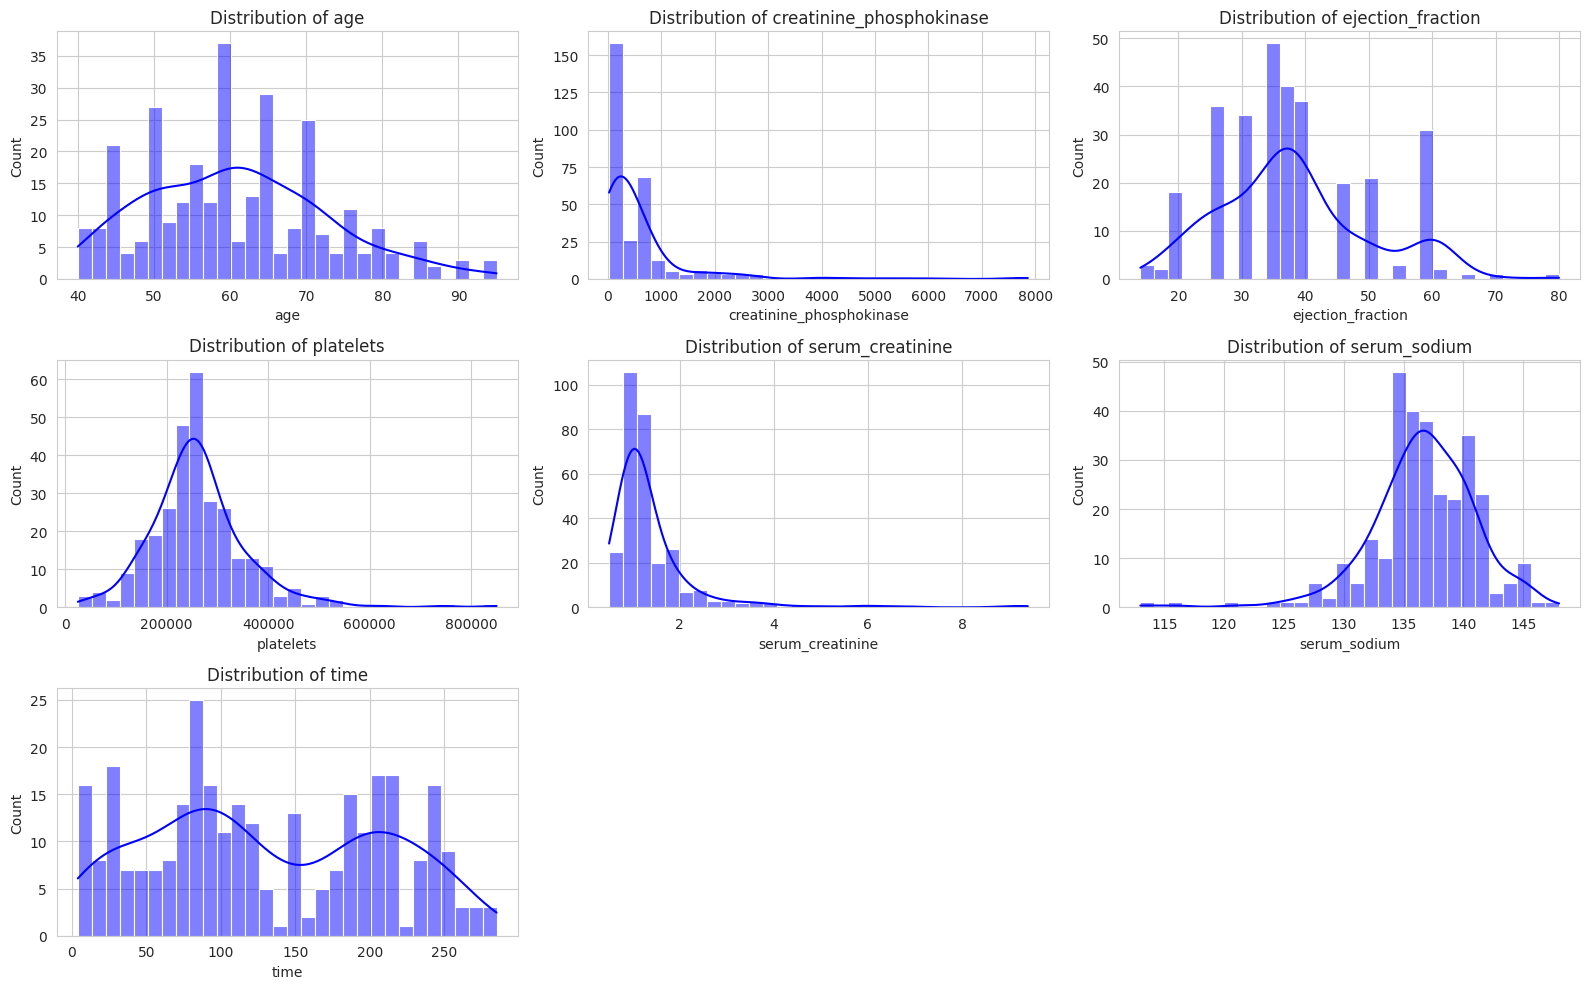

In [123]:
plt.figure(figsize=(16, 10))
for i, column in enumerate(numerical_vars, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
plt.tight_layout()
plt.show()

In [133]:
# Calculate skewness and kurtosis for numerical variables for patients
skew_kurtosis = {
    'Variable': [],
    'Mean': [],
    'Median': [],
    'Skewness': [],
    'Kurtosis': []
}

for column in numerical_vars:
    skew_kurtosis['Variable'].append(column)
    skew_kurtosis['Mean'].append(df[column].mean())
    skew_kurtosis['Median'].append(df[column].median())
    skew_kurtosis['Skewness'].append(skew(df[column]))
    skew_kurtosis['Kurtosis'].append(kurtosis(df[column]))

# Convert results to a DataFrame for better readability
skew_kurtosis_df = pd.DataFrame(skew_kurtosis)

# Display skewness, kurtosis, and mean results
# Instead of using the custom function, display the DataFrame directly:
print("Skewness and Kurtosis for Numerical Variables")
display(skew_kurtosis_df) # Using display from IPython.display makes the output look better in Jupyter notebooks

Skewness and Kurtosis for Numerical Variables


,Variable,Mean,Median,Skewness,Kurtosis
0,age,60.833893,60.0,0.420937,-0.201793
1,creatinine_phosphokinase,581.839465,250.0,4.440689,24.710458
2,ejection_fraction,38.083612,38.0,0.552593,0.020720
3,platelets,263358.029264,262000.0,1.454975,6.085906
4,serum_creatinine,1.393880,1.1,4.433610,25.378346
5,serum_sodium,136.625418,137.0,-1.042870,4.031142
6,time,130.260870,115.0,0.127161,-1.211874


In [125]:
death_patients = df[df['death_event'] == 1]

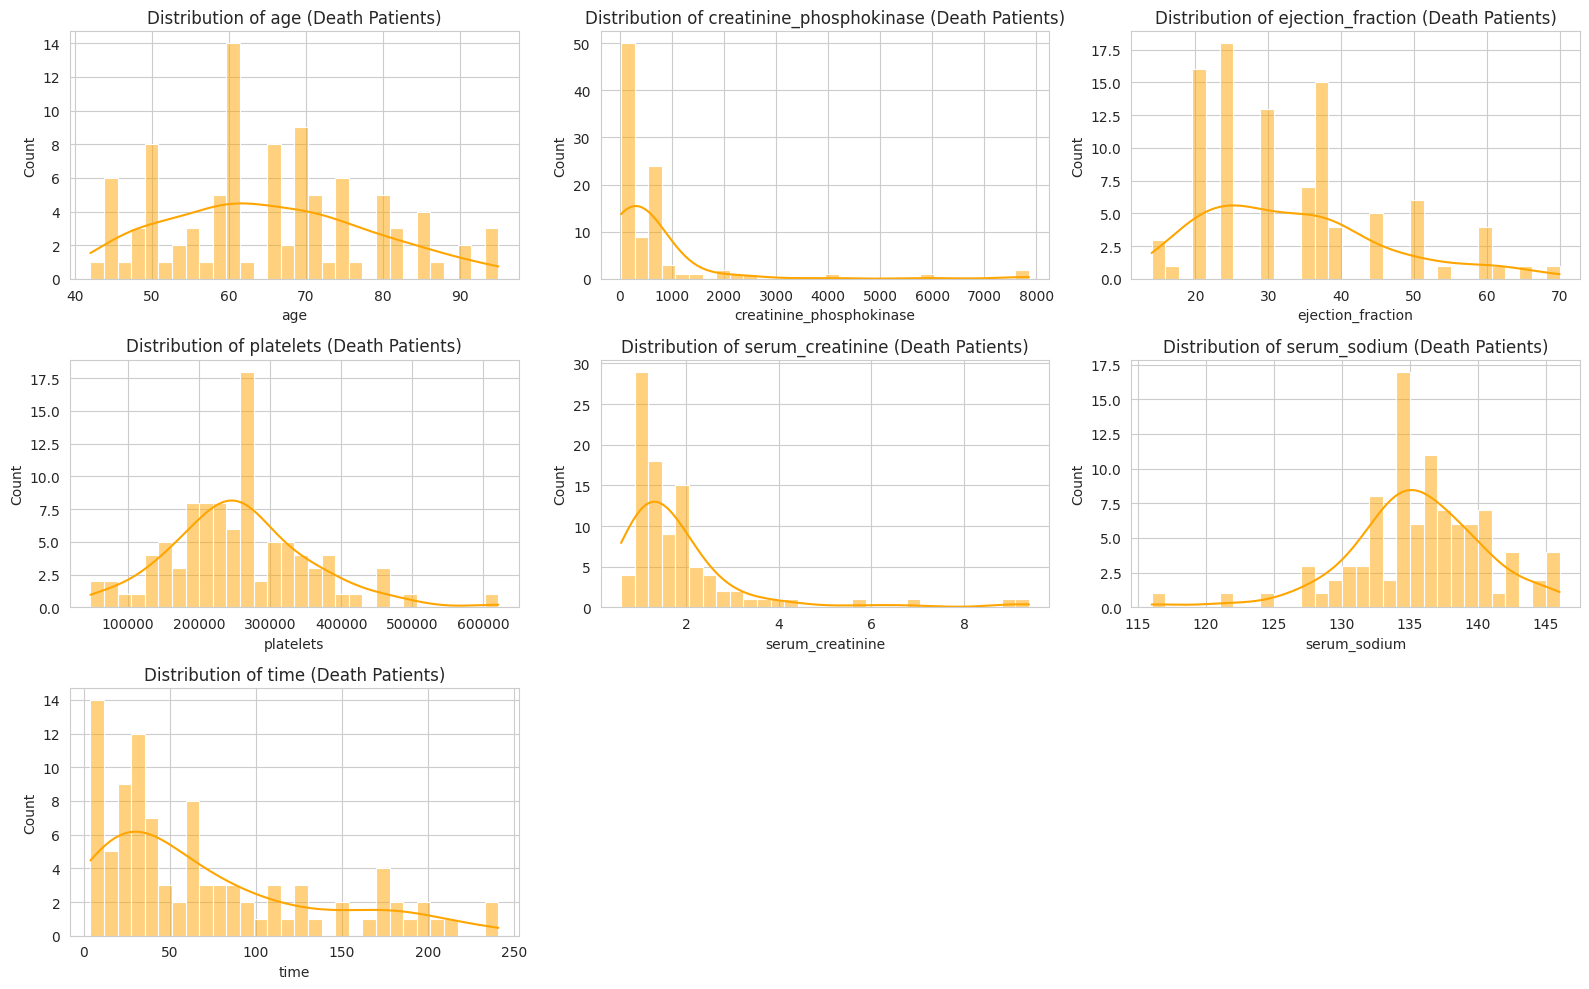

In [126]:
plt.figure(figsize=(16, 10))
for i, column in enumerate(numerical_vars, 1):
    plt.subplot(3, 3, i)
    sns.histplot(death_patients[column], kde=True, bins=30, color='orange')
    plt.title(f"Distribution of {column} (Death Patients)")
    plt.xlabel(column)
plt.tight_layout()
plt.show()

In [127]:
# Calculate skewness and kurtosis for numerical variables for patients with death_event = 1
skew_kurtosis = {
    'Variable': [],
    'Mean (Death Patients)': [],
    'Skewness': [],
    'Kurtosis': []
}

for column in numerical_vars:
    skew_kurtosis['Variable'].append(column)
    skew_kurtosis['Mean (Death Patients)'].append(death_patients[column].mean())
    skew_kurtosis['Skewness'].append(skew(death_patients[column]))
    skew_kurtosis['Kurtosis'].append(kurtosis(death_patients[column]))

# Convert results to a DataFrame for better readability
skew_kurtosis_df = pd.DataFrame(skew_kurtosis)

# Display skewness, kurtosis, and mean results
# Instead of using the custom function, display the DataFrame directly:
print("Skewness and Kurtosis for Numerical Variables (Death Patients)")
display(skew_kurtosis_df) # Using display from IPython.display makes the output look better in Jupyter notebooks

Skewness and Kurtosis for Numerical Variables (Death Patients)


,Variable,Mean (Death Patients),Skewness,Kurtosis
0,age,65.215281,0.298651,-0.664576
1,creatinine_phosphokinase,670.197917,4.190655,18.248276
2,ejection_fraction,33.468750,0.809389,0.133362
3,platelets,256381.044792,0.615464,1.237806
4,serum_creatinine,1.835833,3.351025,12.727019
5,serum_sodium,135.375000,-0.665976,1.912174
6,time,70.885417,1.048109,0.026542


In [128]:
alive_patients = df[df['death_event'] == 0]

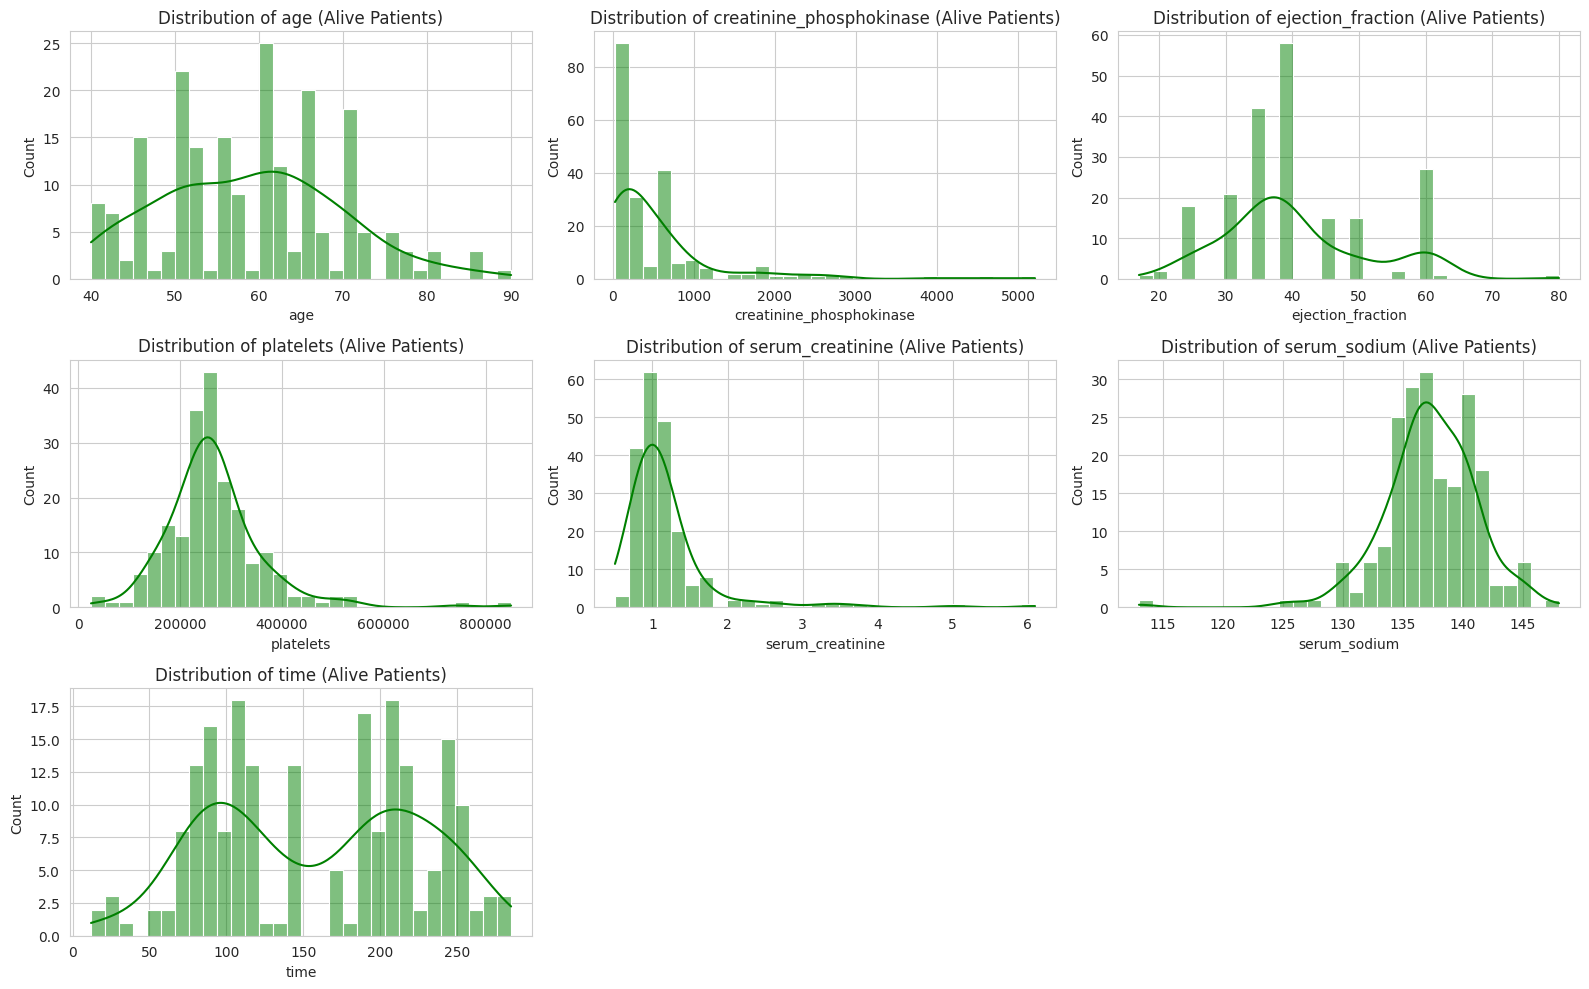

In [129]:
plt.figure(figsize=(16, 10))
for i, column in enumerate(numerical_vars, 1):
    plt.subplot(3, 3, i)
    sns.histplot(alive_patients[column], kde=True, bins=30, color='green')
    plt.title(f"Distribution of {column} (Alive Patients)")
    plt.xlabel(column)
plt.tight_layout()
plt.show()

In [130]:
# Calculate skewness and kurtosis for numerical variables for patients with death_event = 0
skew_kurtosis = {
    'Variable': [],
    'Mean (Alive Patients)': [],
    'Skewness': [],
    'Kurtosis': []
}

for column in numerical_vars:
    skew_kurtosis['Variable'].append(column)
    skew_kurtosis['Mean (Alive Patients)'].append(alive_patients[column].mean())
    skew_kurtosis['Skewness'].append(skew(alive_patients[column]))
    skew_kurtosis['Kurtosis'].append(kurtosis(alive_patients[column]))

# Convert results to a DataFrame for better readability
skew_kurtosis_df = pd.DataFrame(skew_kurtosis)

# Display skewness, kurtosis, and mean results
# Instead of using the custom function, display the DataFrame directly:
print("Skewness and Kurtosis for Numerical Variables (Alive Patients)")
display(skew_kurtosis_df) # Using display from IPython.display makes the output look better in Jupyter notebooks

Skewness and Kurtosis for Numerical Variables (Alive Patients)


,Variable,Mean (Alive Patients),Skewness,Kurtosis
0,age,58.761906,0.261352,-0.363312
1,creatinine_phosphokinase,540.054187,3.171216,12.565675
2,ejection_fraction,40.266010,0.697017,0.190790
3,platelets,266657.489901,1.870321,8.322036
4,serum_creatinine,1.184877,4.139739,22.329492
5,serum_sodium,137.216749,-1.209879,6.299459
6,time,158.339901,-0.047825,-1.231395


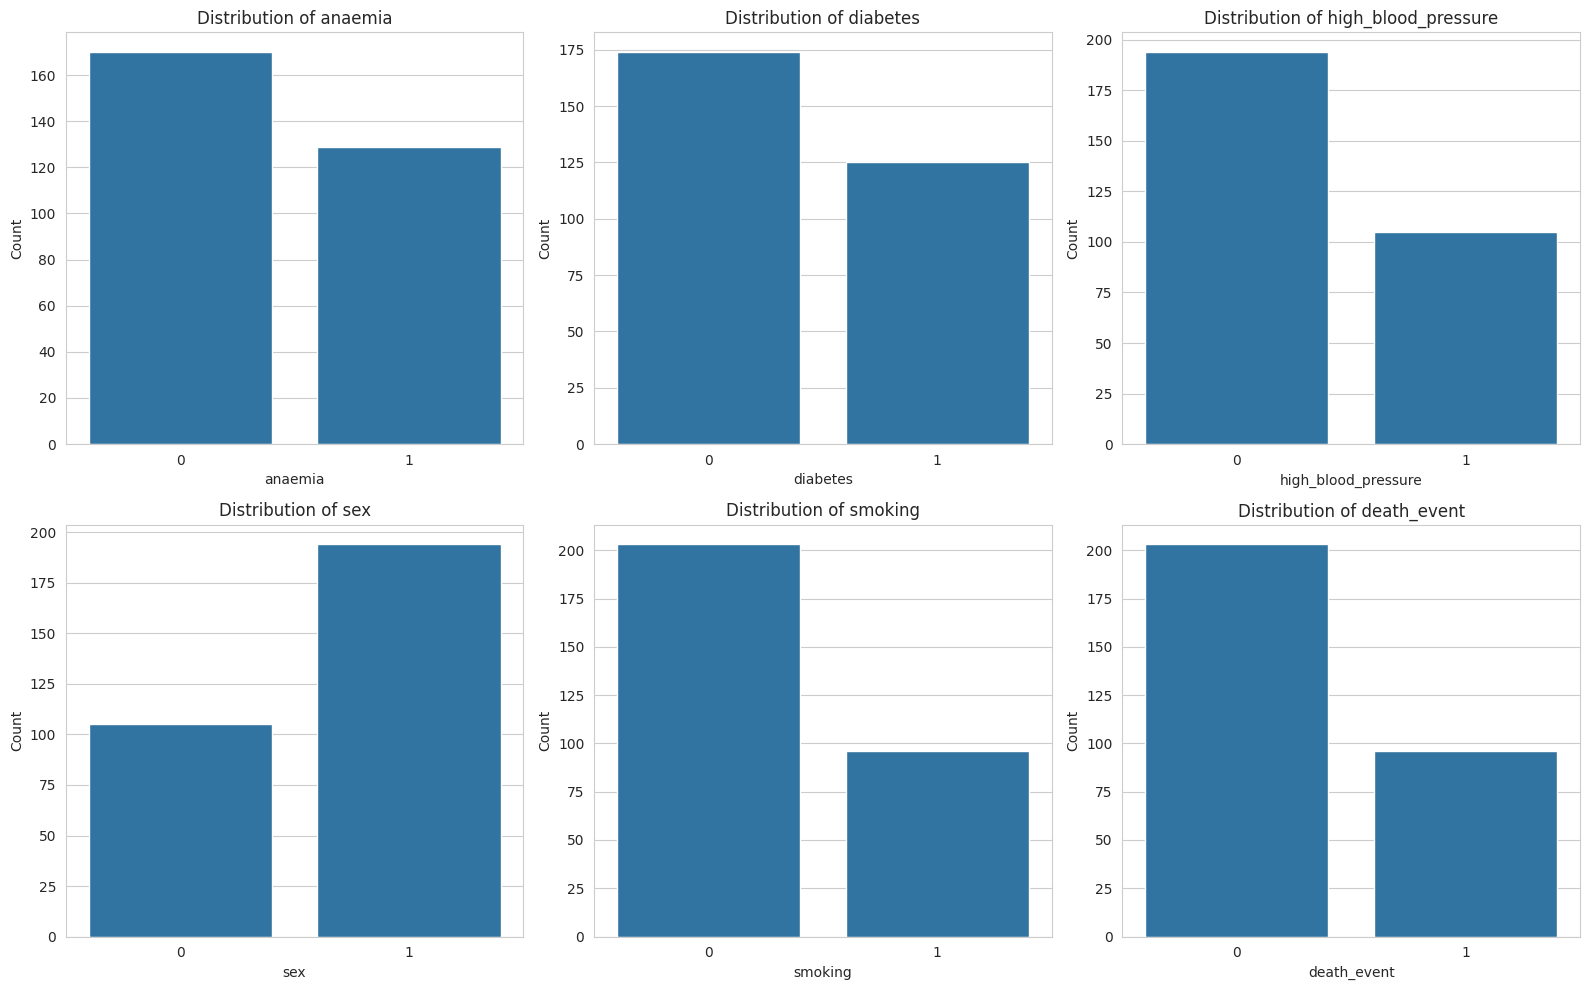

In [131]:
# Analyzing categorical variables
plt.figure(figsize=(16, 10))
for i, column in enumerate(categorical_vars, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=column, data=df)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
plt.tight_layout()
plt.show()

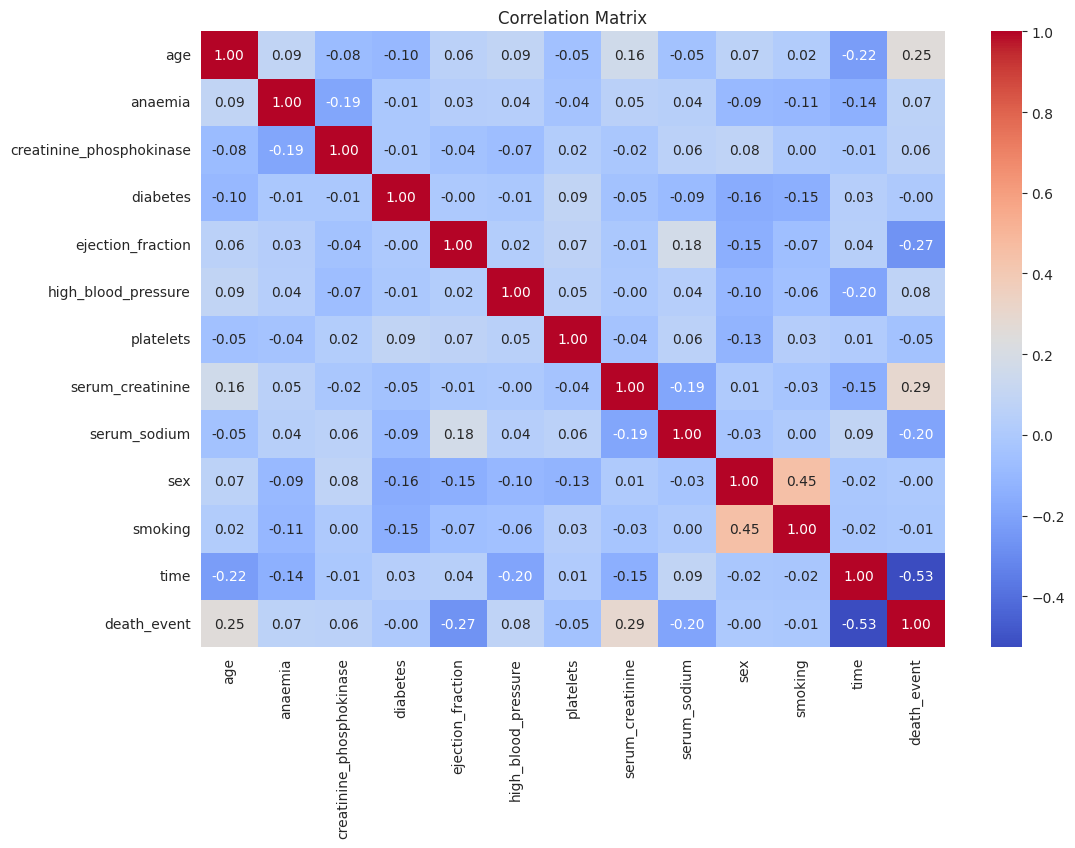

In [132]:
# Correlation matrix
correlation_matrix = df.corr()

# Visualizing correlations with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()